In [3]:
import pandas as pd # 用于数据处理和分析的库
import matplotlib.pyplot as plt # 用于创建静态、动画和交互式可视化的库
import numpy as np # 用于数值计算的基础包，支持大量维度数组和矩阵运算。
import seaborn as sns # 基于 matplotlib 的数据可视化库，提供更高级的界面。
from copy import copy # 用于复制数据结构。
from scipy import stats # SciPy的统计模块，用于执行统计测试和描述性统计。
import plotly.express as px # plotly 相关库：用于创建交互式图表。
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [5]:
# Read the stock data csv file, here's the list of the stocks considered:

# AAPL = Apple Stock 
# BA = Boeing 
# T = AT&T
# MGM = MGM Resorts International (Hotel Industry)
# AMZN = Amazon
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google 
# sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange)
# Check the list of S&P 500 companies here: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

file_path = r'D:\01\Python Programming Fundamentals and Practical Applications in Finance\stocks.csv'
stocks_df = pd.read_csv(file_path)
stocks_df.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [6]:
# Sort the stock data by date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [8]:
# Print out the number of stocks
print ('Total Number of stocks : {}'.format(len(stocks_df.columns[1:])))

Total Number of stocks : 9


In [9]:
# Print the name of stocks
print('Stocks under consideration are: ')

for i in stocks_df.columns[1:]:
    print(i)

Stocks under consideration are: 
AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


In [19]:
# Get the mean values of Apple's Stock
print(stocks_df['AAPL'].mean())

140.819822590088


In [21]:
# Get the mean values of all stocks
stocks_copy_df = stocks_df.drop(columns=['Date']) #  在原有数据结构里先移除日期列，并将修改后的数据结构赋值给一个新的数据表
print(stocks_copy_df.mean())

AAPL      140.819823
BA        189.942700
T          35.162899
MGM        23.105743
AMZN      915.665665
IBM       161.853001
TSLA      259.600815
GOOG      783.712512
sp500    2218.749554
dtype: float64


In [22]:
# Get the standard deviation of stocks (Volatility)
print(stocks_copy_df.std())

AAPL      70.827601
BA       103.678586
T          3.207490
MGM        6.963847
AMZN     697.838905
IBM       25.561938
TSLA     210.988003
GOOG     334.448057
sp500    537.321727
dtype: float64


In [23]:
# Statistical data of the dataframe
stocks_copy_df.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

In [24]:
# Check if data contains any null values
stocks_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [25]:
# Getting dataframe info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [28]:
# Define a function to plot the entire dataframe
# The function takes in a dataframe df as an input argument and does not return anything back!
# The function performs data visualization
# Pandas works great with matplotlib, you can simply plot data directly from a Pandas DataFrame using plot() method

def show_plot(df, fig_title):
    # 调用 pandas DataFrame 的 .plot() 方法来创建一个图表。这里，指定 'Date' 作为 x 轴。这意味着 DataFrame 中应该有一个名为 'Date' 的列，它将作为图表的横坐标。
    df.plot(x = 'Date', figsize = (15, 7), linewidth = 3, title = fig_title)
    plt.grid() # 这行调用 matplotlib.pyplot 的 .grid() 方法来添加网格线到图表
    plt.show() #这行确保图表被渲染并且显示在屏幕上。这是在绘图脚本中常见的命令，用于确保所有的绘图设置都被绘制出来。

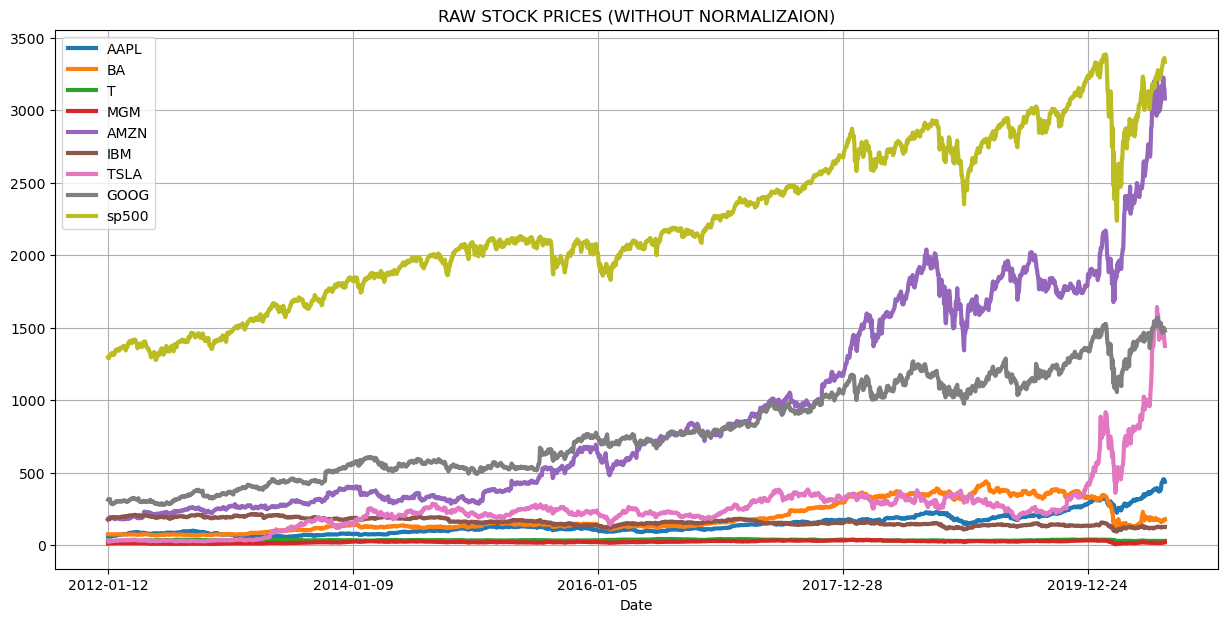

In [29]:
# Plot the data
show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZAION)')

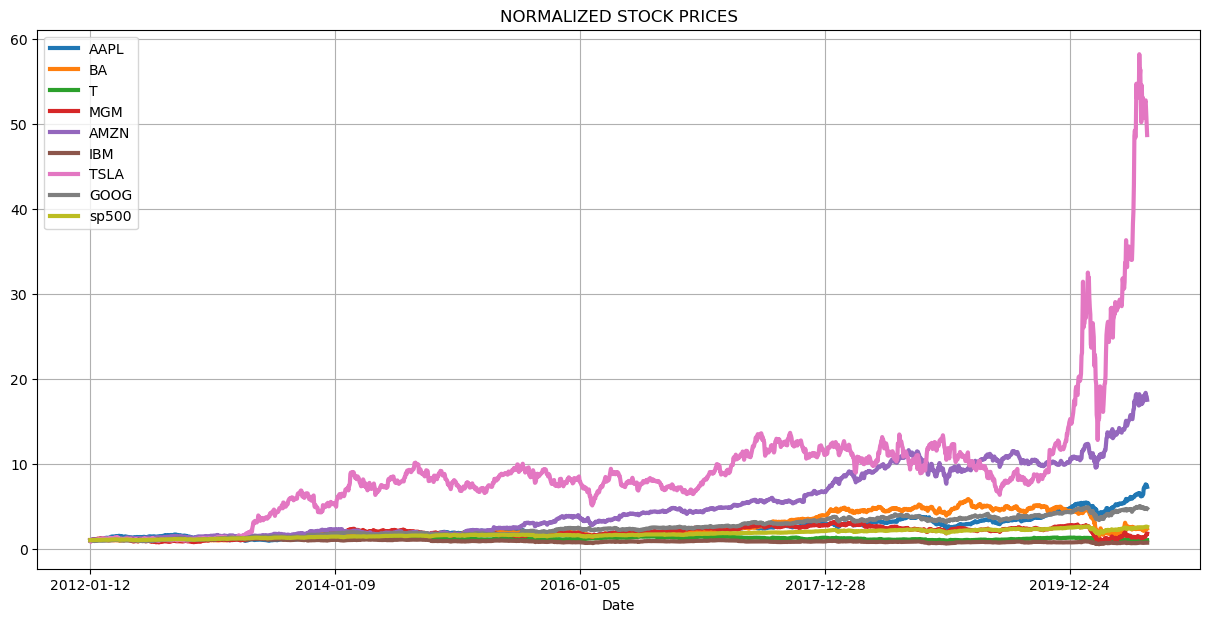

In [30]:
# Print out normalized (scaled) stock prices
def normalize(df):
    # 复制传入的 DataFrame 并赋值给变量 x。这是为了避免在原始数据 df 上直接修改，保持数据的不可变性。
    x = df.copy()

    for i in x.columns[1:]:
        # 在循环内部，每列的值都被它自己的第一个元素 (x[i][0]) 除，这样每个系列的初始值变为 1
        # 这是规范化的一个常见做法，尤其是在处理时间序列数据时，它有助于比较不同规模或单位的序列。
        x[i] = x[i]/x[i][0]

    return x

show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES') #show_plot 函数被调用，其中规范化后的 DataFrame 和图表标题 'NORMALIZED STOCK PRICES' 作为参数传入。

In [48]:
# Function to perform an interactive data plotting using plotly express
# Plotly.express module which is imported as px includes functions that can plot interactive plots easily and effectively. 
# Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance. 

def interactive_plot(df, title):
    fig = px.line(title = title) #使用 Plotly Express 创建一个折线图对象 fig，并设置其标题。

    # Loop through each stock (while ignoring time columns with index 0)
    for i in df.columns[1:]:
        # 对于每一列数据，添加一个散点图到图表中。x = df['Date'] 指定 x 轴数据为日期，y = df[i] 是 y 轴数据，name = i 设置图例名称。
        fig.add_scatter(x = df['Date'], y=df[i], name = i) # add a new Scatter trace

    fig.show() # 显示图表

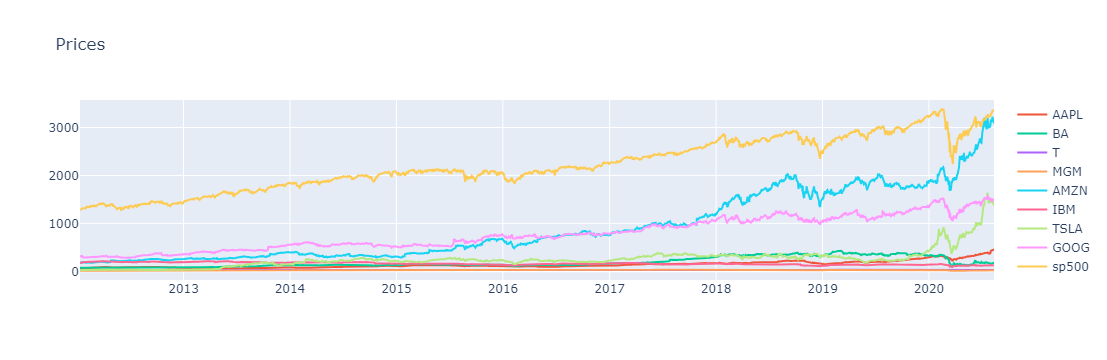

In [49]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

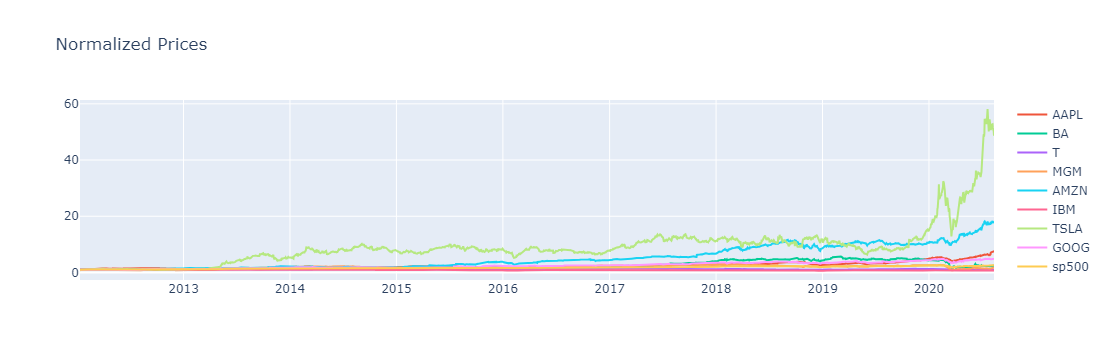

In [39]:
interactive_plot(normalize(stocks_df), 'Normalized Prices')

In [50]:
# Let's calculate daily return for a single security
# Let's take the S&P500 as an example first

df = stocks_df['sp500'] # 提取名为 'sp500' 的列数据。

# Define a dataframe names df_daily_return
df_daily_return = df.copy() # 复制这列数据到新变量，用于存储计算结果。

#Loop through every element in the dataframe
for j in range(1, len(df)): # 从第二个数据点开始遍历，因为第一个数据点没有前一天的数据来比较。

    # Calculate the percentage of change from the previous day
    df_daily_return[j] = ((df[j] - df[j-1]) / df[j-1]) * 100

# put zero in the first line item
df_daily_return[0] = 0
df_daily_return


0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

In [51]:
# Let's define a function to calculate stocks daily returns (for all stocks) 
def daily_return(df):
    df_daily_return = df.copy()

    # Loop through each stock (while ignoring time columns with index 0)
    for i in df.columns[1:]:

        # Loop through each row belonging to the stock
        for j in range(1, len(df)):

            # Calculate the percentage of change from the previous day
            df_daily_return[i][j] = ((df[i][j] - df[i][j-1]) / df[i][j-1]) * 100

        # Set the value of first row to zero since the previous value is not available
        df_daily_return[i][0] = 0

    return df_daily_return

In [52]:
# Get the daily return
stocks_daily_return = daily_return(stocks_df)

In [53]:
stocks_daily_return

Date      AAPL        BA         T        MGM      AMZN       IBM  \
0     2012-01-12  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
1     2012-01-13 -0.374946 -1.205144 -0.166006   1.813685  1.415339 -0.769869   
2     2012-01-17  1.164812  0.857909  0.598603  -0.809717  1.815943  0.468852   
3     2012-01-18  1.038382 -0.239234  0.264463   3.918367  4.282725  0.594448   
4     2012-01-19 -0.316937  0.666134  0.296736   0.549882  2.644634 -0.303752   
...          ...       ...       ...       ...        ...       ...       ...   
2154  2020-08-05  0.362467  5.579446 -0.533156   0.000000  2.109065 -0.309917   
2155  2020-08-06  3.488923 -1.193483 -0.033501  10.406699  0.623082  0.534082   
2156  2020-08-07 -2.449458 -1.265966  0.603217   3.087768 -1.784187 -0.919762   
2157  2020-08-10  1.453480  5.522880  0.599604  13.767729 -0.609323  1.720552   
2158  2020-08-11 -2.973987  0.401316  0.000000  -0.692841 -2.143792 -0.283220   

           TSLA      GOOG     sp500  
0      0.000000  0.000000  0.000000  
1    -19.327430 -0.738516 -0.494792  
2     16.717854  0.574410  0.355295  
3      0.789470  0.688856  1.110793  
4     -0.186494  1.052283  0.493866  
...         ...       ...       ...  
2154  -0.133153  0.589774  0.642974  
2155   0.307062  1.797626  0.642770  
2156  -2.475194 -0.373974  0.063303  
2157  -2.350092  0.107728  0.274222  
2158  -3.114399 -1.054744 -0.796913  

[2159 rows x 10 columns]

In [54]:
# Daily Return Correlation
# corr() 方法计算 DataFrame 中所有数值列的相关系数矩阵，默认方法是皮尔逊相关系数。这对于分析各股票收益率之间的关系很有帮助，能显示出哪些股票的行为相似。
cm = stocks_daily_return.drop(columns = ['Date']).corr()

<Axes: >

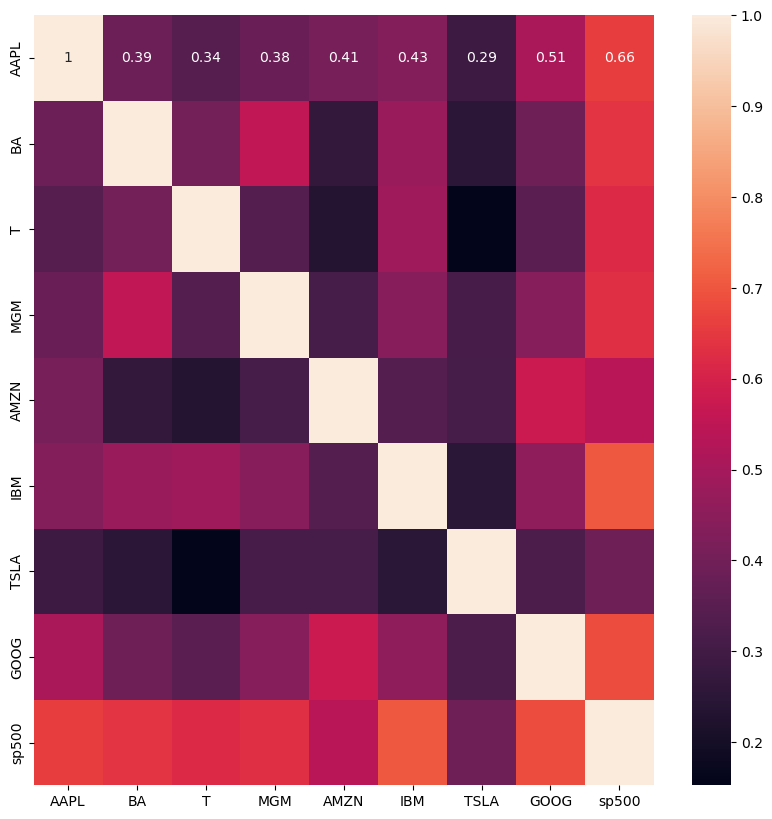

In [56]:
plt.figure(figsize = (10, 10)) # 设置图形的大小为 10x10 英寸。
ax = plt.subplot() # 创建一个 matplotlib 子图对象 ax
# 使用 seaborn 的 heatmap 函数在子图 ax 上绘制相关系数矩阵 cm 的热图，annot=True 表示在热图格子中显示数值。
sns.heatmap(cm, annot = True, ax = ax)

array([[<Axes: title={'center': 'AAPL'}>, <Axes: title={'center': 'BA'}>,
        <Axes: title={'center': 'T'}>],
       [<Axes: title={'center': 'MGM'}>,
        <Axes: title={'center': 'AMZN'}>,
        <Axes: title={'center': 'IBM'}>],
       [<Axes: title={'center': 'TSLA'}>,
        <Axes: title={'center': 'GOOG'}>,
        <Axes: title={'center': 'sp500'}>]], dtype=object)

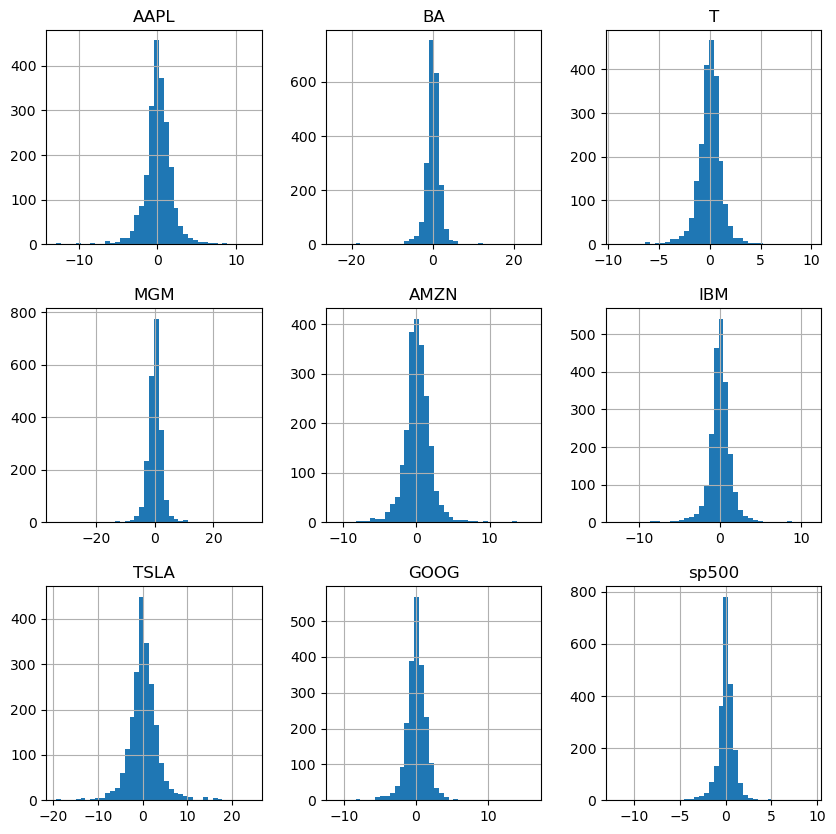

In [58]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
# Notice how Tesla Standard deviation is high indicating a more volatile stock

# hist(): Pandas DataFrame 的方法，用于绘制每列数据的直方图。
# figsize=(10, 10): 图形大小设置为 10x10 英寸。
# bins=40: 指定直方图的箱体宽度，这里设置了 40 个箱体。
stocks_daily_return.hist(figsize=(10, 10), bins = 40)

In [61]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe

df_hist = stocks_daily_return.copy() # 复制日收益率数据，以便修改而不影响原始数据。

# Drop the data
df_hist = df_hist.drop(columns = ['Date']) # 移除日期列，因为日期数据对于计算和绘图不需要。

data = [] # 初始化一个空列表，用于存储每列的数据。

# Loop through every column
# 循环遍历 df_hist 的每列，将每列的值作为数组追加到 data 列表中。
for i in df_hist.columns:
    data.append(df_hist[i].values)

data

[array([ 0.        , -0.37494578,  1.16481192, ..., -2.44945751,
         1.45347999, -2.9739868 ]),
 array([ 0.        , -1.20514366,  0.85790887, ..., -1.26596576,
         5.52287953,  0.40131597]),
 array([ 0.        , -0.16600597,  0.59860326, ...,  0.60321716,
         0.5996036 ,  0.        ]),
 array([ 0.        ,  1.81368508, -0.8097166 , ...,  3.08776831,
        13.76772918, -0.69284065]),
 array([ 0.        ,  1.41533854,  1.8159433 , ..., -1.78418726,
        -0.60932259, -2.14379167]),
 array([ 0.        , -0.76986928,  0.46885241, ..., -0.91976211,
         1.72055219, -0.28322004]),
 array([  0.        , -19.32743009,  16.71785359, ...,  -2.47519409,
         -2.35009162,  -3.1143992 ]),
 array([ 0.        , -0.73851634,  0.57441015, ..., -0.37397414,
         0.10772812, -1.05474435]),
 array([ 0.        , -0.49479228,  0.35529545, ...,  0.06330295,
         0.27422185, -0.79691324])]

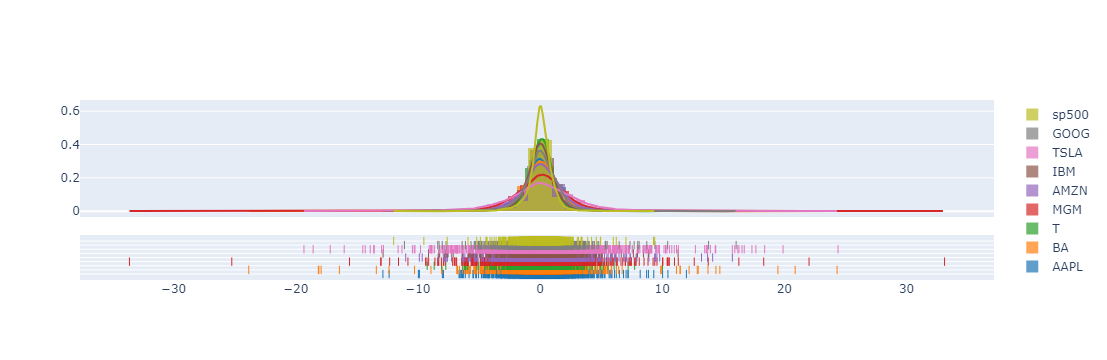

In [69]:
# Plotly's Python API contains a super powerful module known as figure factory module 
# Figure factory module includes wrapper functions that create unique chart types such as interactive subplots 
# Check this out for more information: https://plotly.com/python/figure-factory-subplots/
# Notice how Boeing, Tesla and MGM gains are losses are sometimes extreme! This will indicate a more risky investment and will be quantified later using Sharpe Ratio

#  Plotly figure factory 的 create_distplot 方法用于创建一个分布图，它可以同时显示多个数据集的直方图和核密度估计(KDE)。
fig = ff.create_distplot(data, df_hist.columns) # data: 包含了所有股票日收益率数据的列表。df_hist.columns: 作为图例标签，表示每个分布图对应的股票名称。
fig.show()